In [1]:
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np
import pandas as pd
import datetime as dt
import pandas_datareader.data as web
import quandl
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf

In [2]:
google=pd.read_csv('Google Stock Price Train Set.csv')

In [3]:
google.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [4]:
google.head()
google.size


20804

In [5]:
google.index


RangeIndex(start=0, stop=2972, step=1)

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# CORRELATION PLOT

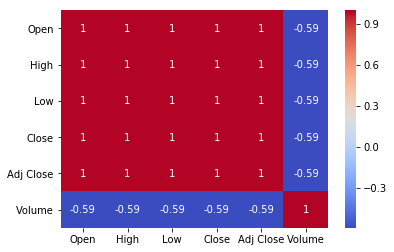

In [7]:
sns.heatmap(google.corr(),annot=True,cmap='coolwarm')
plt.savefig('corr.png')

In [8]:
google.index

RangeIndex(start=0, stop=2972, step=1)

In [9]:
google.Date=pd.to_datetime(google.Date)

In [10]:
google.set_index('Date',inplace=True)

In [11]:
google.index

DatetimeIndex(['2006-08-22', '2006-08-23', '2006-08-24', '2006-08-25',
               '2006-08-28', '2006-08-29', '2006-08-30', '2006-08-31',
               '2006-09-01', '2006-09-05',
               ...
               '2018-05-30', '2018-05-31', '2018-06-01', '2018-06-04',
               '2018-06-05', '2018-06-06', '2018-06-07', '2018-06-08',
               '2018-06-11', '2018-06-12'],
              dtype='datetime64[ns]', name='Date', length=2972, freq=None)

In [12]:
google.head(5)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2006-08-22,187.644547,188.404602,186.208893,187.922745,187.922745,8382300
2006-08-23,187.599838,187.912811,185.125931,185.508453,185.508453,7331900
2006-08-24,186.010178,186.983856,184.927231,185.657471,185.657471,7010200
2006-08-25,185.334579,186.447342,185.046448,185.423996,185.423996,4965400
2006-08-28,186.591400,189.244156,186.288376,189.244156,189.244156,8382000


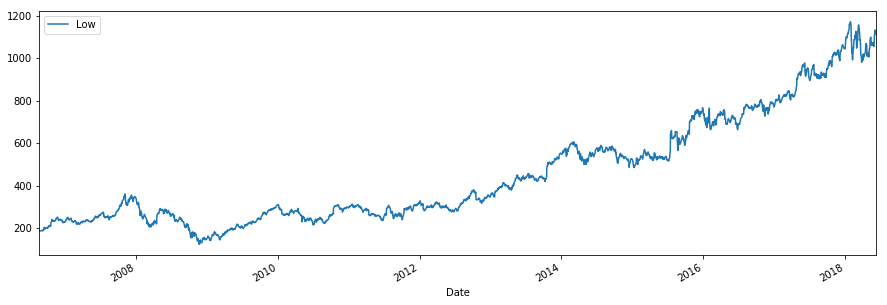

In [13]:
plt.figure(figsize=(19,1))
google['Low'].plot(figsize=(15,5))

plt.legend()

In [14]:
import plotly
plotly.tools.set_credentials_file(username='shivani98MANGAL', api_key='NMZBptQTeU73iO95WJsS')

In [15]:
plt.figure(figsize=(19,1))
google['High'].iplot()#figsize=(15,5))
#plt.legend()

C:\Users\Shivani Mangal\AppData\Local\Programs\Python\Python36\lib\site-packages\IPython\core\display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



<Figure size 1368x72 with 0 Axes>

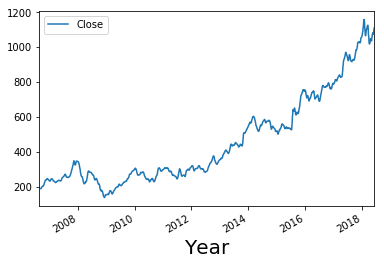

In [16]:
Close= google[['Close']]
Close.rolling(12).mean().plot()
plt.xlabel('Year', fontsize=20);

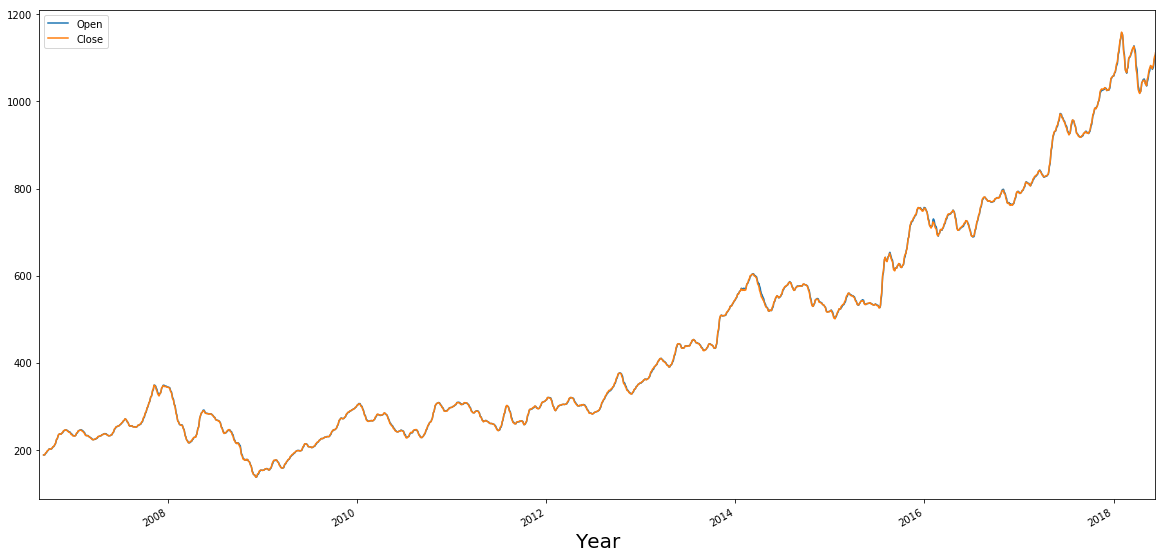

In [17]:
Open=google[['Open']]
open_close = pd.concat([Open.rolling(12).mean(), Close.rolling(12).mean()], axis=1)
open_close.plot(figsize=(20,10))
plt.xlabel('Year', fontsize=20);

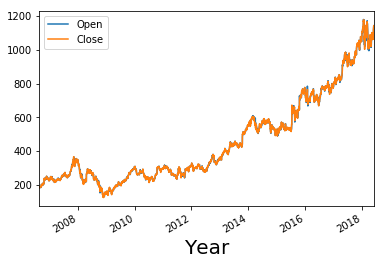

In [18]:
Open=google[['Open']]
open_close = pd.concat([Open, Close], axis=1)
open_close.plot()#figsize=(20,10))
plt.xlabel('Year', fontsize=20);

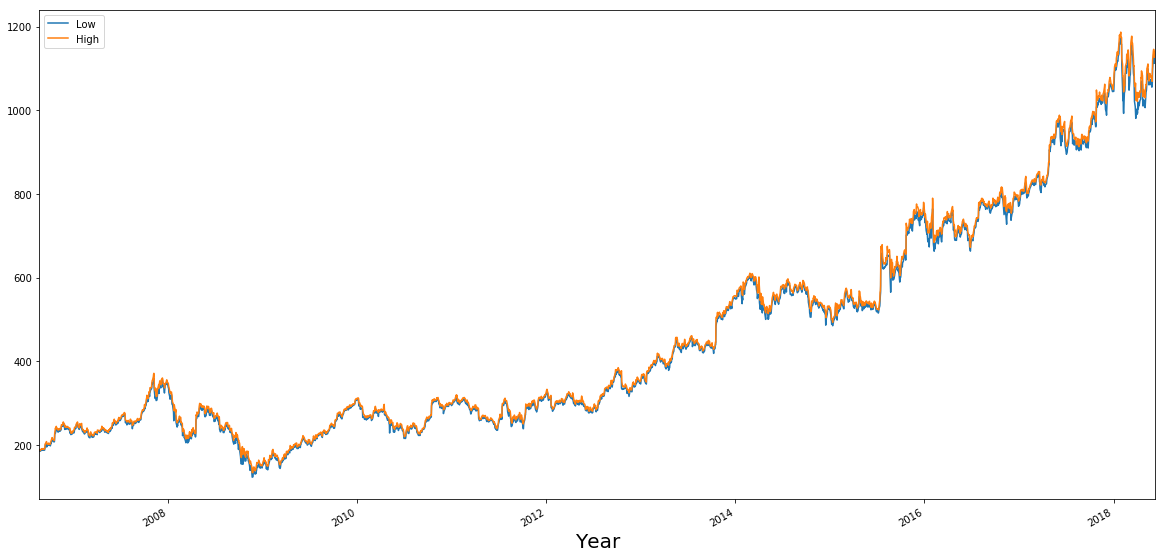

In [19]:
Low=google[['Low']]
High=google[['High']]
low_high = pd.concat([Low, High], axis=1)
low_high.plot(figsize=(20,10))
plt.xlabel('Year', fontsize=20);

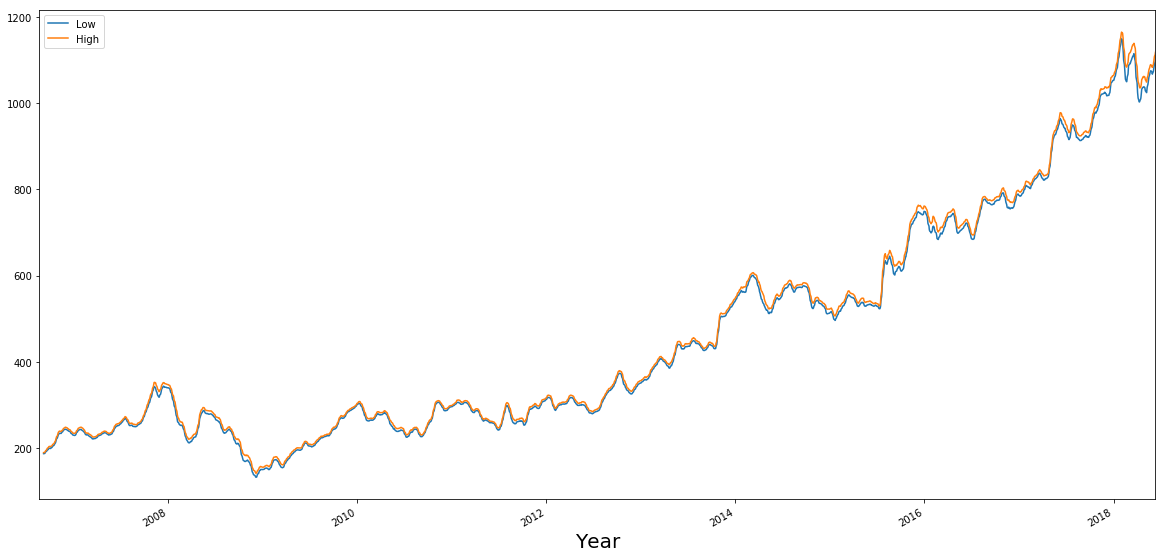

In [20]:
Low=google[['Low']]
High=google[['High']]
low_high = pd.concat([Low.rolling(12).mean(), High.rolling(12).mean()], axis=1)
low_high.plot(figsize=(20,10))
plt.xlabel('Year', fontsize=20);

In [21]:
monthly = google['Close'].resample('MS').mean()

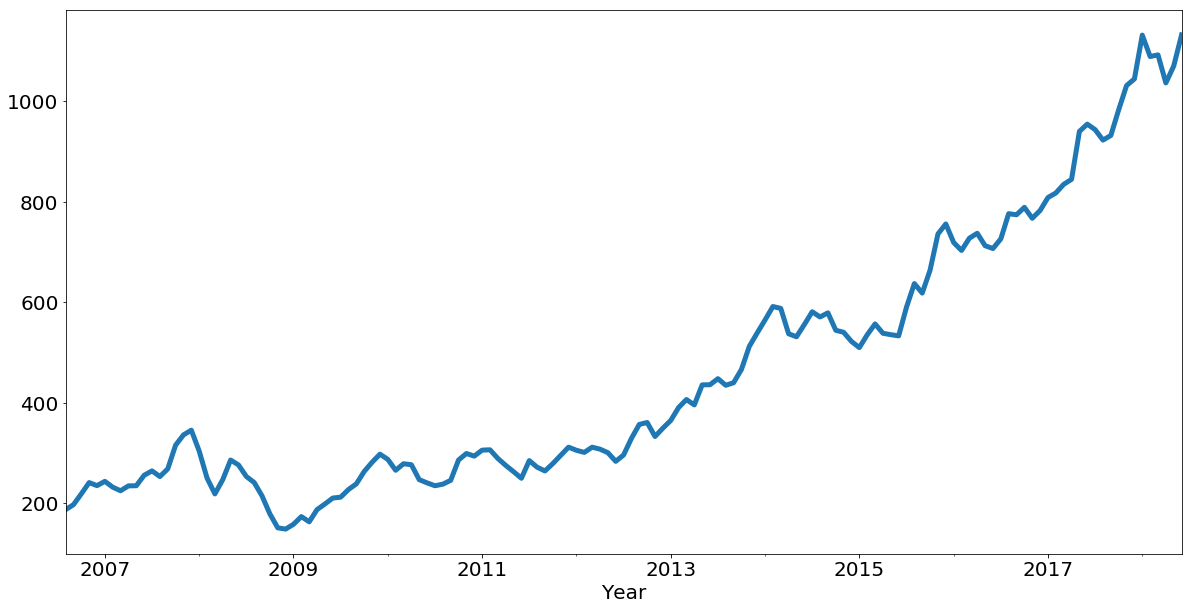

In [22]:
monthly.plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20);

In [23]:
yearly = google['Close'].resample('A').mean()
yearly

Date
2006-12-31     220.102020
2007-12-31     267.634514
2008-12-31     230.924069
2009-12-31     218.423533
2010-12-31     266.080947
2011-12-31     282.648726
2012-12-31     319.331297
2013-12-31     439.264377
2014-12-31     558.270558
2015-12-31     601.550547
2016-12-31     743.486707
2017-12-31     921.780837
2018-12-31    1086.307764
Freq: A-DEC, Name: Close, dtype: float64

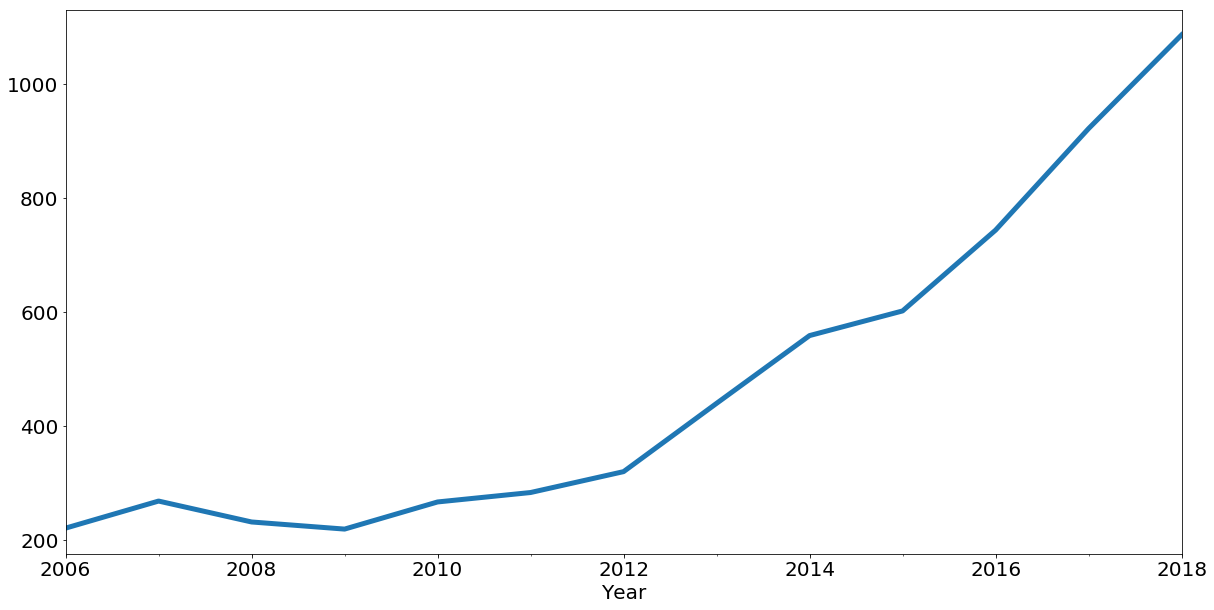

In [24]:
yearly.plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20);

In [25]:
monthly['2017':]

Date
2017-01-01     807.904752
2017-02-01     816.916581
2017-03-01     834.111307
2017-04-01     844.056840
2017-05-01     939.284085
2017-06-01     953.766823
2017-07-01     942.865009
2017-08-01     922.023045
2017-09-01     931.299502
2017-10-01     982.522275
2017-11-01    1030.492844
2017-12-01    1043.653003
2018-01-01    1130.770467
2018-02-01    1088.206839
2018-03-01    1091.490479
2018-04-01    1035.696187
2018-05-01    1069.275901
2018-06-01    1131.171249
Freq: MS, Name: Close, dtype: float64

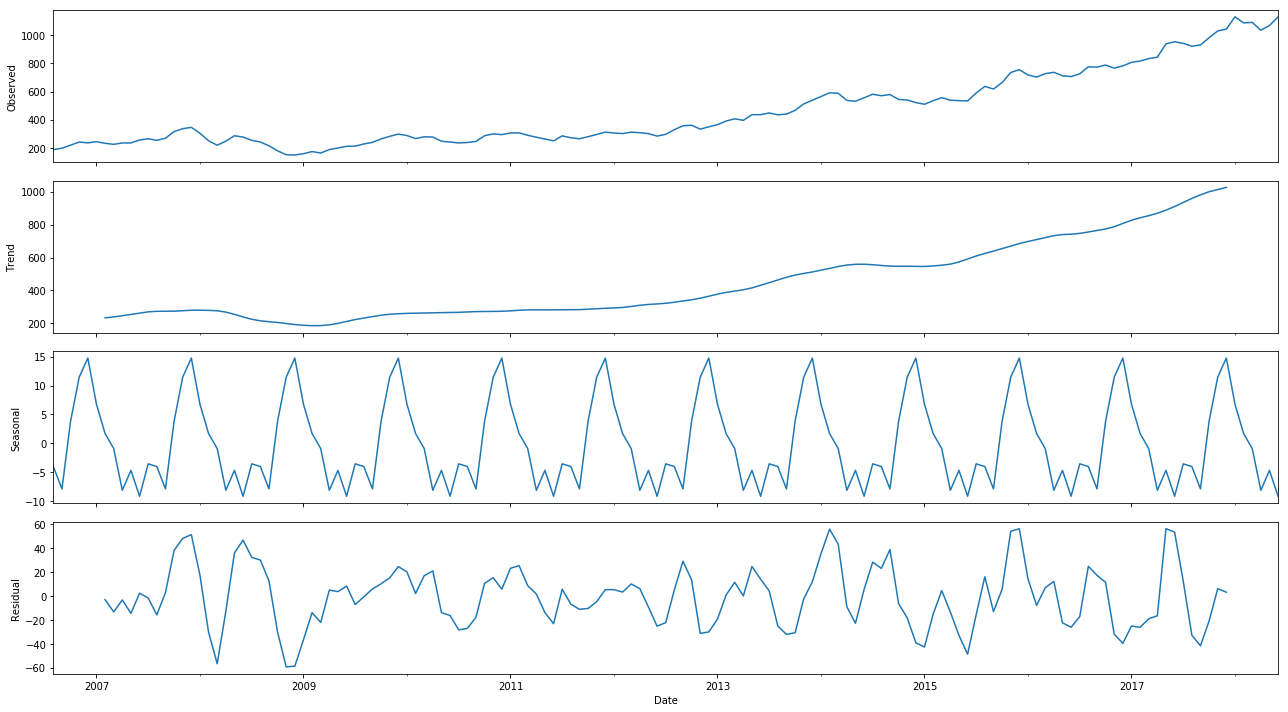

In [26]:
from pylab import rcParams
import statsmodels.api as sm
rcParams['figure.figsize'] = 18, 10
decomposition = sm.tsa.seasonal_decompose(monthly, model='additive')
fig = decomposition.plot()
fig.savefig('trend_season.png')

# ARIMA MODELLING

# Step 1 : CHECKING IF THE TIME SERIES IS STATIONARY -> NOT STATIONARY

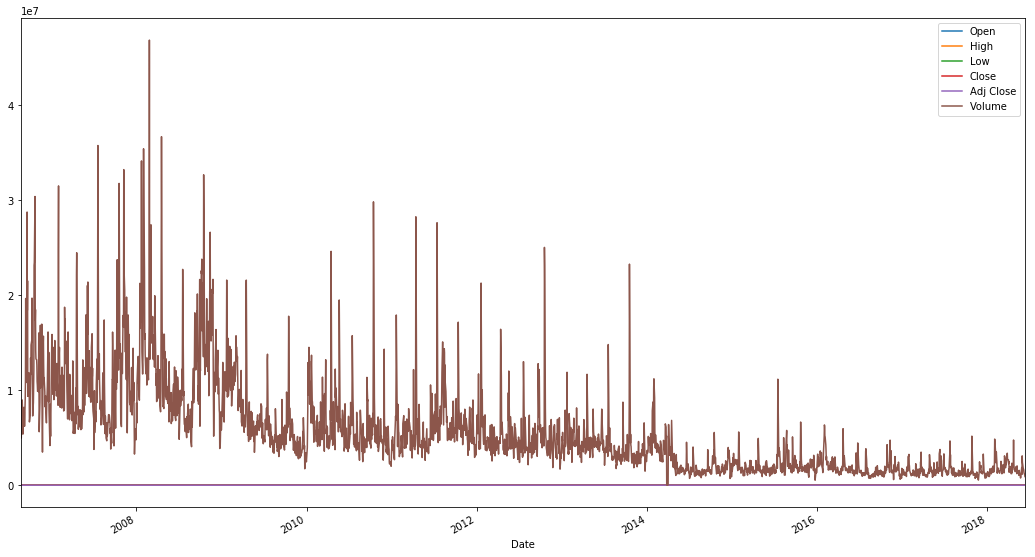

In [27]:
google.plot()
plt.savefig('nonstationary.png')

# Step 2  MAKING IT STATIONARY - DIFFERENCES/INTEGRATED

In [28]:
diff1=google.diff(periods=1)

In [29]:
diff1.head()



,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2006-08-22,NaN,NaN,NaN,NaN,NaN,NaN
2006-08-23,-0.044709,-0.491791,-1.082962,-2.414292,-2.414292,-1050400.0
2006-08-24,-1.589660,-0.928955,-0.198700,0.149018,0.149018,-321700.0
2006-08-25,-0.675599,-0.536514,0.119217,-0.233475,-0.233475,-2044800.0
2006-08-28,1.256821,2.796814,1.241928,3.820160,3.820160,3416600.0


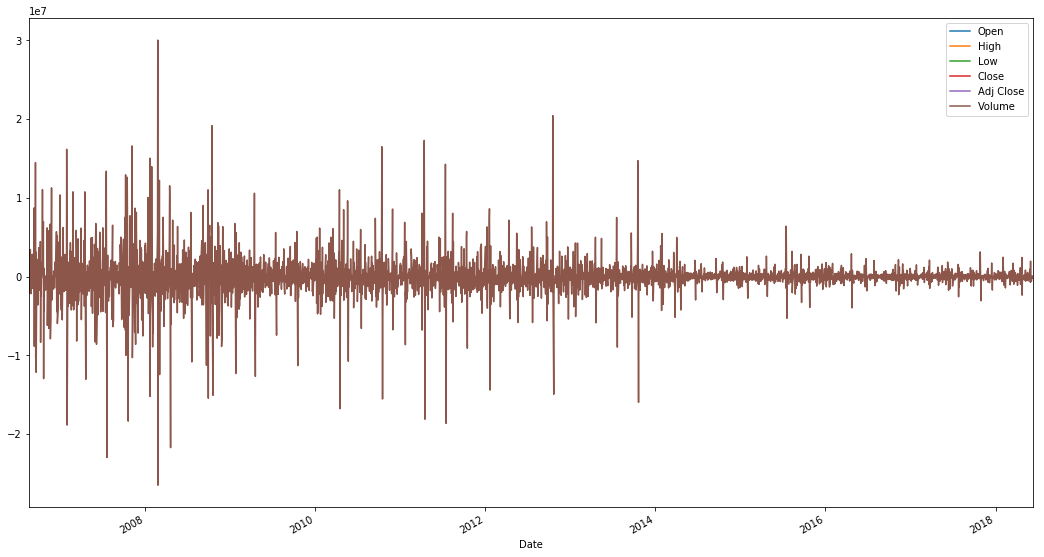

In [30]:
diff1.plot()
plt.savefig('stationary.png')

In [31]:
diff2=google.diff(2)
diff2.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2006-08-22,NaN,NaN,NaN,NaN,NaN,NaN
2006-08-23,NaN,NaN,NaN,NaN,NaN,NaN
2006-08-24,-1.634369,-1.420746,-1.281662,-2.265274,-2.265274,-1372100.0
2006-08-25,-2.265259,-1.465469,-0.079483,-0.084457,-0.084457,-2366500.0
2006-08-28,0.581222,2.260300,1.361145,3.586685,3.586685,1371800.0


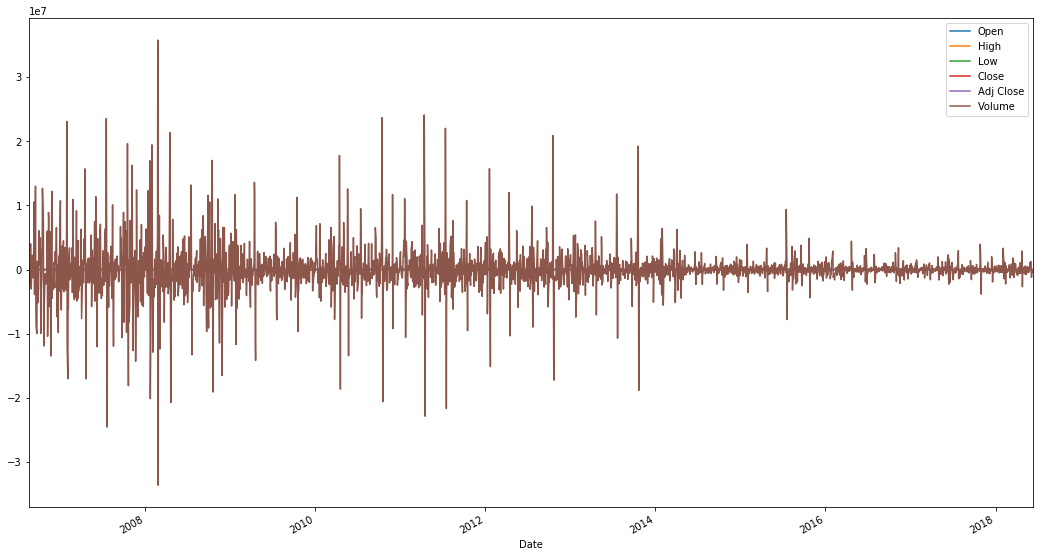

In [32]:
diff2.plot()

# Step 3 :AUTOCORRELATION CHECK - ACF PLOT

In [33]:
from statsmodels.graphics.tsaplots import plot_acf

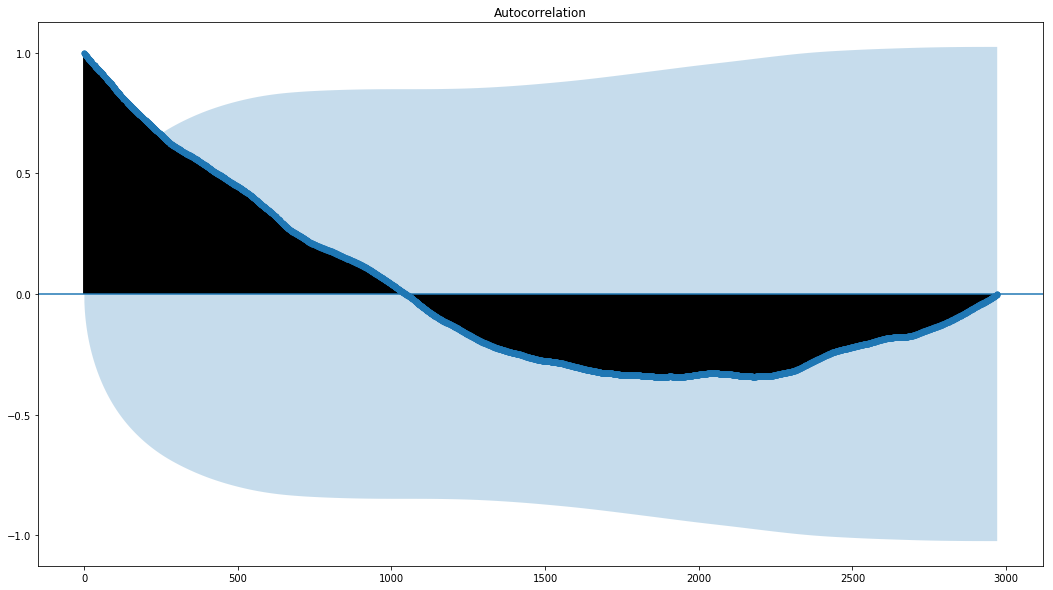

In [34]:
plot_acf(google['Close'])

plt.savefig('acf.png')

Step 4 : ARIMA MODELLING FOR DIFFERENT VALUES OF p,d,q

In [35]:
from statsmodels.tsa.arima_model import ARIMA

In [36]:
c=google['Close']
c
c.index

DatetimeIndex(['2006-08-22', '2006-08-23', '2006-08-24', '2006-08-25',
               '2006-08-28', '2006-08-29', '2006-08-30', '2006-08-31',
               '2006-09-01', '2006-09-05',
               ...
               '2018-05-30', '2018-05-31', '2018-06-01', '2018-06-04',
               '2018-06-05', '2018-06-06', '2018-06-07', '2018-06-08',
               '2018-06-11', '2018-06-12'],
              dtype='datetime64[ns]', name='Date', length=2972, freq=None)

In [37]:
train  = google['Close'].loc[:]
train

Date
2006-08-22     187.922745
2006-08-23     185.508453
2006-08-24     185.657471
2006-08-25     185.423996
2006-08-28     189.244156
2006-08-29     188.250610
2006-08-30     189.144791
2006-08-31     188.041962
2006-09-01     188.076736
2006-09-05     190.938126
2006-09-06     188.841766
2006-09-07     188.022095
2006-09-08     187.704163
2006-09-11     190.804001
2006-09-12     194.683777
2006-09-13     201.971375
2006-09-14     200.684738
2006-09-15     203.615677
2006-09-18     206.005142
2006-09-19     200.600296
2006-09-20     197.217285
2006-09-21     202.110474
2006-09-22     200.585388
2006-09-25     200.684738
2006-09-26     202.120407
2006-09-27     200.158157
2006-09-28     200.486038
2006-09-29     199.651459
2006-10-02     199.422943
2006-10-03     200.714539
                 ...     
2018-05-01    1037.310059
2018-05-02    1024.380005
2018-05-03    1023.719971
2018-05-04    1048.209961
2018-05-07    1054.790039
2018-05-08    1053.910034
2018-05-09    1082.760010
2018-05

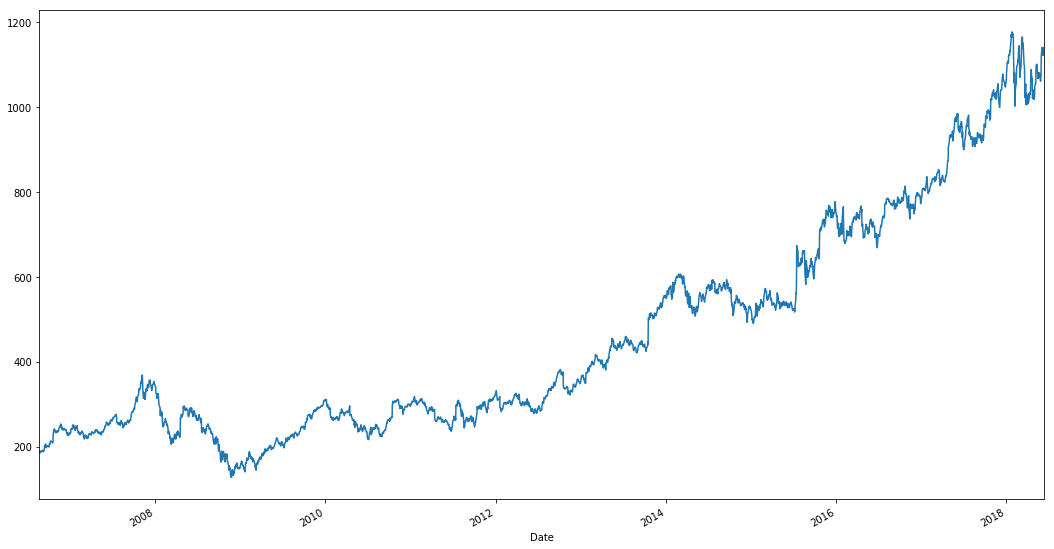

In [38]:
train.plot()

In [39]:
arima_model = ARIMA(train,order=(1,1,0)) #p,d,q
arima_fit = arima_model.fit()


C:\Users\Shivani Mangal\AppData\Local\Programs\Python\Python36\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Shivani Mangal\AppData\Local\Programs\Python\Python36\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



In [40]:
arima_model = ARIMA(google['Close'],order=(1,1,0)) #p,d,q
arima_fit = arima_model.fit()


C:\Users\Shivani Mangal\AppData\Local\Programs\Python\Python36\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Shivani Mangal\AppData\Local\Programs\Python\Python36\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



In [41]:
print(arima_fit.aic)

20589.835701414864


In [42]:
pred = arima_fit.forecast(steps=50)[0]

In [43]:
pred

array([1139.96740278, 1140.2995892 , 1140.62032784, 1140.94065079,
       1141.26095865, 1141.58126596, 1141.90157325, 1142.22188055,
       1142.54218784, 1142.86249513, 1143.18280242, 1143.50310971,
       1143.823417  , 1144.1437243 , 1144.46403159, 1144.78433888,
       1145.10464617, 1145.42495346, 1145.74526075, 1146.06556804,
       1146.38587534, 1146.70618263, 1147.02648992, 1147.34679721,
       1147.6671045 , 1147.98741179, 1148.30771909, 1148.62802638,
       1148.94833367, 1149.26864096, 1149.58894825, 1149.90925554,
       1150.22956284, 1150.54987013, 1150.87017742, 1151.19048471,
       1151.510792  , 1151.83109929, 1152.15140658, 1152.47171388,
       1152.79202117, 1153.11232846, 1153.43263575, 1153.75294304,
       1154.07325033, 1154.39355763, 1154.71386492, 1155.03417221,
       1155.3544795 , 1155.67478679])

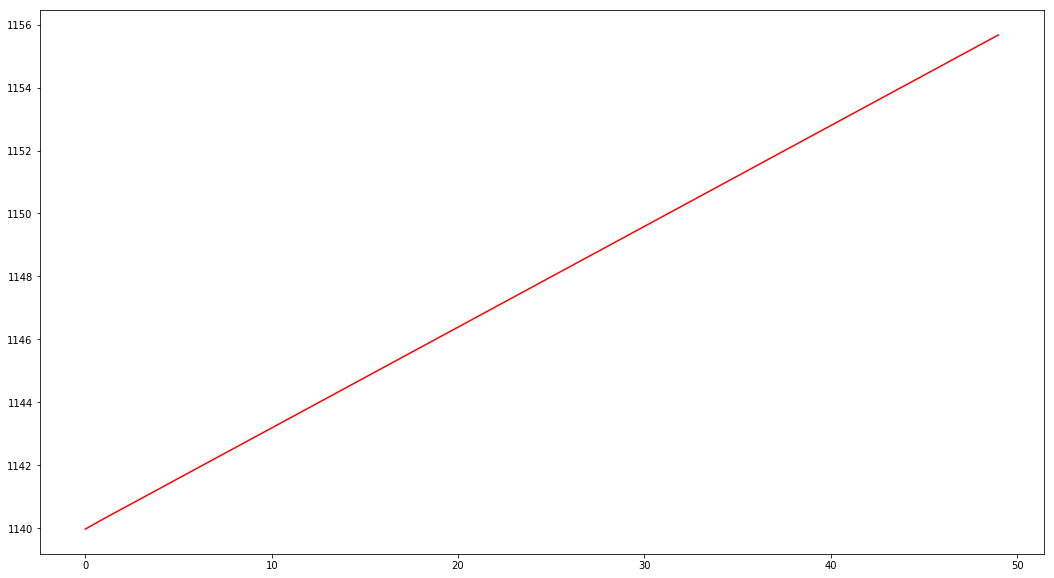

In [44]:

plt.plot(pred,color='red')

In [45]:
test = pd.read_csv('Google Stock Price Test Set.csv')

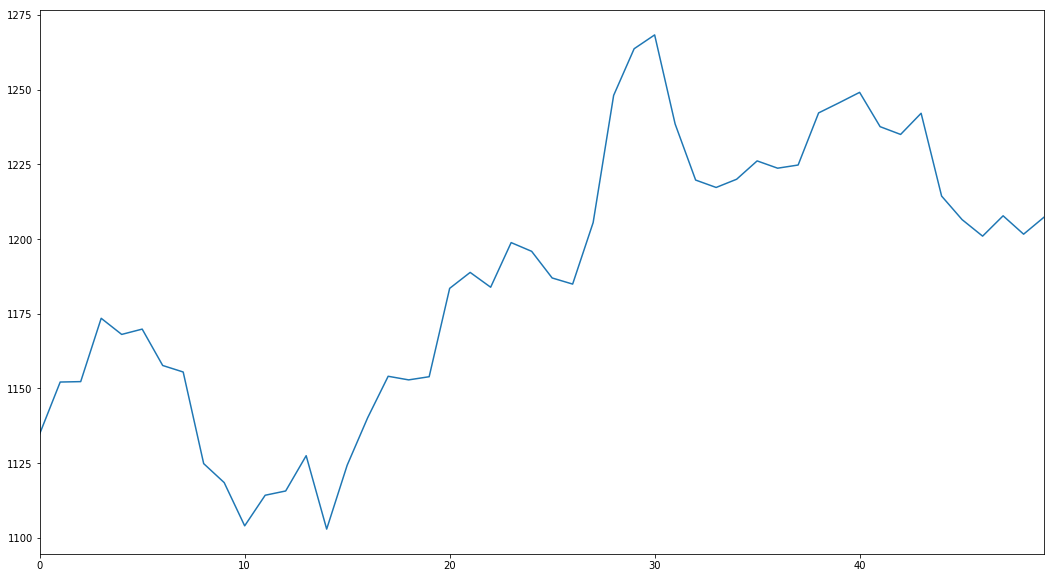

In [46]:
test['Close'].plot()

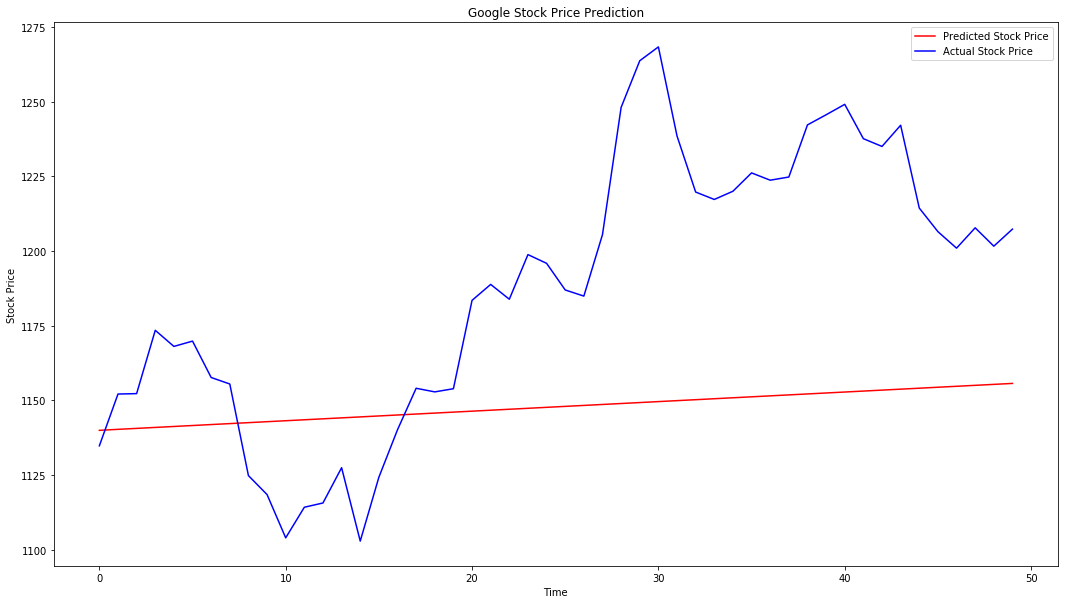

In [47]:
plt.plot(pred, color = 'red', label = 'Predicted Stock Price')
plt.plot(test['Close'], color = 'blue', label = 'Actual Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [48]:
import pyramid
from pyramid.arima import auto_arima
stepwise_model = auto_arima(yearly, start_p=1, start_q=1,
                           max_p=3, max_q=3, m=12,
                           start_P=0, seasonal=False,
                           d=1, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)

C:\Users\Shivani Mangal\AppData\Local\Programs\Python\Python36\lib\site-packages\pyramid\__init__.py:68: UserWarning:


    The 'pyramid' package will be migrating to a new namespace beginning in 
    version 1.0.0: 'pmdarima'. This is due to a package name collision with the
    Pyramid web framework. For more information, see Issue #34:
    
        https://github.com/tgsmith61591/pyramid/issues/34
        
    The package will subsequently be installable via the name 'pmdarima'; the
    only functional change to the user will be the import name. All imports
    from 'pyramid' will change to 'pmdarima'.
    



Fit ARIMA: order=(1, 1, 1); AIC=136.249, BIC=138.189, Fit time=0.299 seconds
Fit ARIMA: order=(0, 1, 0); AIC=139.119, BIC=140.088, Fit time=0.000 seconds
Fit ARIMA: order=(1, 1, 0); AIC=135.418, BIC=136.873, Fit time=0.062 seconds
Fit ARIMA: order=(0, 1, 1); AIC=135.424, BIC=136.879, Fit time=0.031 seconds
Fit ARIMA: order=(2, 1, 0); AIC=137.289, BIC=139.228, Fit time=0.062 seconds
Fit ARIMA: order=(2, 1, 1); AIC=145.641, BIC=148.065, Fit time=0.196 seconds
Total fit time: 0.683 seconds


In [49]:
# Recurrent Neural Network



# Part 1 - Data Preprocessing

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the training set
dataset_train = pd.read_csv('Google Stock Price Train Set.csv')
training_set = dataset_train.iloc[:, 1:2].values

# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

# Creating a data structure with 60 timesteps and 1 output
X_train = []
y_train = []
for i in range(60, 2972):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))



# Part 2 - Building the RNN

# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

# Initialising the RNN
regressor = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)



# Part 3 - Making the predictions and visualising the results

# Getting the real stock price of June, July and August 2018
dataset_test = pd.read_csv('Google Stock Price Test Set.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

# Getting the predicted stock price of June, July and August 2018
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []



Using TensorFlow backend.


Epoch 1/100
2912/2912 [==============================] - 15s 5ms/step - loss: 0.0134
Epoch 2/100
2912/2912 [==============================] - 10s 3ms/step - loss: 0.0024
Epoch 3/100
2912/2912 [==============================] - 10s 3ms/step - loss: 0.0021
Epoch 4/100
2912/2912 [==============================] - 10s 3ms/step - loss: 0.0020
Epoch 5/100
2912/2912 [==============================] - 10s 3ms/step - loss: 0.0016
Epoch 6/100
2912/2912 [==============================] - 10s 3ms/step - loss: 0.0019
Epoch 7/100
2912/2912 [==============================] - 10s 3ms/step - loss: 0.0018
Epoch 8/100
2912/2912 [==============================] - 10s 4ms/step - loss: 0.0016
Epoch 9/100
2912/2912 [==============================] - 11s 4ms/step - loss: 0.0014
Epoch 10/100
2912/2912 [==============================] - 10s 4ms/step - loss: 0.0016
Epoch 11/100
2912/2912 [==============================] - 10s 4ms/step - loss: 0.0015
Epoch 12/100
2912/2912 [==============================] - 10s 4

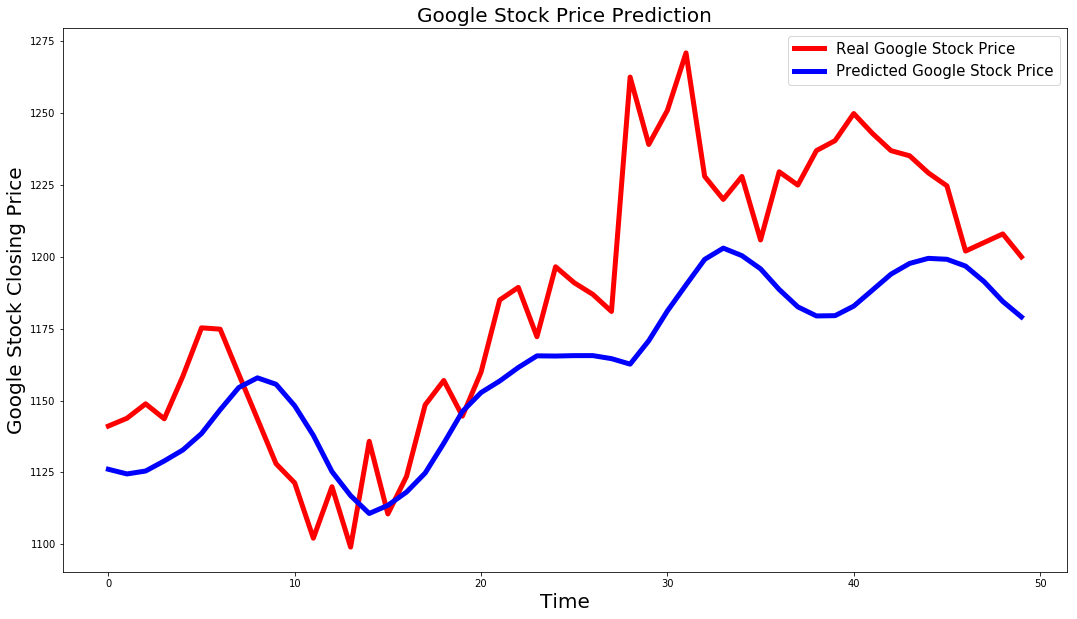

In [55]:
X_test = []
for i in range(60, 110):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

# Visualising the results
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price',linewidth=5)#, fontsize=20)
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price',linewidth=5)#, fontsize=20)
plt.title('Google Stock Price Prediction',fontsize=20)
plt.xlabel('Time', fontsize=20)
plt.ylabel('Google Stock Closing Price', fontsize=20)
plt.legend(fontsize=15)
plt.show()